In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import os
import subprocess
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Q1 What is the email listed under the contact information in sample.html
open1 = open("sample.html")
sample_html = BeautifulSoup(open1, "html.parser")
#find = sample_html.find("a", recursive = True, href= True, string = "mailto:")
find = sample_html.find("a", href=lambda href: href and href.startswith("mailto:"))
if find:
    email = find.get('href').replace('mailto:', '')

email
#if find:
#    mail = find.get("href").replace('mailto:', '')
#    print(mail)

#https://www.tutorialspoint.com/find-the-text-of-the-given-tag-using-beautifulsoup#:~:text=Pass%20the%20HTML%20file%20or,property%20of%20the%20label%20object.
#assistance

'contact@example.com'

In [3]:
#Q2 What is the highest-ranked institution in Germany?
pddf = pd.read_html("rankings.html")
pddf = pddf[0]
germany_uni = pddf.loc[(pddf["Country"] == "Germany") & (pddf["National Rank"] == 1)]
best_german = pddf.loc[(pddf["Country"] == "Germany")]["World Rank"].iloc[0]
germany_uni["Institution"].iloc[0]

'Ludwig Maximilian University of Munich'

In [4]:
#Q3 List the lowest 10 institutions in the USA that were ranked better than the highest-ranked institution in Germany?
usa_university =  pddf.loc[pddf["Country"] == "USA"]
usa_university_10 = usa_university[usa_university["World Rank"] < best_german]
usa_university_10.tail(10)["Institution"].tolist()
#https://www.geeksforgeeks.org/how-to-convert-pandas-dataframe-into-a-list/

['Duke University',
 'University of Illinois at Urbana–Champaign',
 'University of Washington - Seattle',
 'University of Wisconsin–Madison',
 'New York University',
 'University of Texas at Austin',
 'University of California, San Diego',
 'University of California, San Francisco',
 'University of North Carolina at Chapel Hill',
 'Dartmouth College']

In [5]:
#Q4 What are the top five highest-ranked institutions based on Research Rank in India?
#india_uni = pddf.loc[pddf["Country"] == "India"]
#india_uni_rank = india_uni.sort_values(by = "Research Rank", ascending = True)
#india_uni_rank = india_uni_rank.sort_values(by = "Research Rank", ascending = True)
#india_uni_rank
#india_uni_rank.head(5)["Institution"].tolist()

pddf["Research Rank"] = pd.to_numeric(pddf["Research Rank"], errors = "coerce")
india_institution = pddf[pddf["Country"] == "India"]
india_institution_5 = india_institution.sort_values(by = "Research Rank")
india_institution_5.head(5)["Institution"].tolist()

['Indian Institute of Science',
 'Tata Institute of Fundamental Research',
 'Indian Institute of Technology Bombay',
 'Indian Institute of Technology Madras',
 'University of Delhi']

In [6]:
#Q5 What is the first line of output from git log when run in the flask repo directory
#subprocess.check_output("git checkout main", shell = True)
#git_log = subprocess.check_output("git checkout main;cd ~/; cd labs-and-projects/mp2/;cd flask/; git log", shell = True)
subprocess.check_output("git checkout main", shell = True, cwd="flask")
git_log = subprocess.check_output("git log", shell = True, cwd="flask")
git_log_list = git_log.decode("utf-8").splitlines()
git_log_list_commit = []
for s in git_log_list:
    if s.startswith("commit"):
        git_log_list_commit.append(s)
git_log_list_commit[0]

#https://www.geeksforgeeks.org/python-program-to-find-the-string-in-a-list/
#commit 660994efc761efdfd49ca442b73f6712dc77b6cf 

Previous HEAD position was f8789197 With -> with in headline
Switched to branch 'main'


'commit 660994efc761efdfd49ca442b73f6712dc77b6cf'

In [7]:
#Q6 What are the commit numbers of the 10 earliest commits?
early_commit = git_log_list_commit[-10:]
commits_10 = []
for commit in early_commit:
    remove = commit.replace("commit ", "")
    commits_10.append(remove)
    
commits_10

['a9d4ea81da28ee9c894bf9d45adc4cfa9d52fddc',
 '727c701686c18c4a27ca523eb0c5862d497be24e',
 '4edec48b74dbb9d571e927b69b24c30ec0624975',
 '625eba4bb403296a8bbc1e72cc9cf4a5126f6c02',
 '4aa76212d1be9b17a57249549c2a73fb10b6cda8',
 '3b36bef2e6165bb4dad73d17f23ee1879e99f497',
 '44b42e0fbd93d86e0f4e929bda8e5fb63e81035d',
 '4ec7d2a0d8eac4f915dc0d38a886cd57045bb0c4',
 'b15ad394279fc3b7f998fa56857f334a7c0156f6',
 '33850c0ebd23ae615e6823993d441f46d80b1ff0']

In [8]:
#Q7 What did the README file contain after the 100th commit?
flask = subprocess.check_output("git checkout main;cd ~/; cd labs-and-projects/mp2/flask/; git log --reverse --oneline | sed -n '100p'; git checkout f8789197", shell = True)
directory = os.path.expanduser("~/labs-and-projects/mp2/flask/README")
open(directory, 'r').read()

    
#https://docs.python.org/3/library/os.path.html

error: Your local changes to the following files would be overwritten by checkout:
	mp2/mp2.csv
	mp2/mp2.ipynb
Please commit your changes or stash them before you switch branches.
Aborting
Note: switching to 'f8789197'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at f8789197 With -> with in headline


"\n                          // Flask //\n\n         because sometimes a pocket knife is not enough\n\n\n    ~ What is Flask?\n\n      Flask is a microframework for Python based on Werkzeug\n      and Jinja2.  It's intended for small scale applications\n      and was development with best intentions in mind.\n\n    ~ Is it ready?\n\n      A preview release is out now, and I'm hoping for some\n      input about what you want from a microframework and\n      how it should look like.  Consider the API to slightly\n      improve over time.\n\n    ~ What do I need?\n\n      Jinja 2.4 and Werkzeug 0.6.1.  `easy_install` will\n      install them for you if you do `easy_install Flask==dev`.\n      I encourage you to use a virtualenv.  Check the docs for\n      complete installation and usage instructions.\n\n    ~ Where are the docs?\n\n      Go to http://flask.pocoo.org/ for a prebuild version of\n      the current documentation.  Otherwise build them yourself\n      from the sphinx sources i

In [9]:
#Q8 How many pull requests were merged from each GitHub user?  Only output users who appear 10 or more times.
counts={}
for user in git_log_list:
    if "Merge pull request" in user and "/" in user:
        start = user.rfind(' ') + 1
        end = user.find('/')
        username = user[start:end]
        
        if username in counts:
            counts[username] += 1
        else:
            counts[username] = 1
            
sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))

sorted_counts_10 = {}

for key in sorted_counts:
    if sorted_counts[key] > 10:
        sorted_counts_10[key] = sorted_counts[key]
        
sorted_counts_10

{'pallets': 204,
 'davidism': 45,
 'greyli': 42,
 'untitaker': 20,
 'pgjones': 14,
 'ThomasWaldmann': 13,
 'ThiefMaster': 11,
 'SimonSapin': 11}

In [10]:
#Q9 What is the output of pip3 instal?  (yes, the misspelling was intentional)
try:
    msg = subprocess.check_output(["pip3", "instal"], stderr=subprocess.STDOUT)
except subprocess.CalledProcessError as e:
    msg = e.output
    
msg.decode("utf-8")
#subprocess.check_output(["pip3", "instal"])
#check_output(["pip3", "instal"])

'ERROR: unknown command "instal" - maybe you meant "install"\n'

In [11]:
import numpy as np

def rand_df(rows):
    return pd.DataFrame(np.random.randint(10, size=(rows, 5)),
                        columns=["A", "B", "C", "D", "E"],
                        index=[f"r{i}" for i in range(1, rows+1)])
df = rand_df(500)

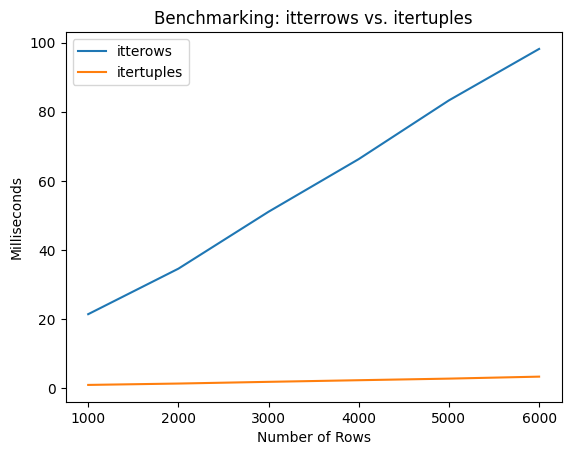

In [12]:
#Q10 What is faster for looping over a DataFrame, iterrows or itertuples
import time
t0 = time.time()
for row in df.iterrows():
    pass
t1 = time.time()

plotting_data = pd.Series(dtype=float)
for i in range(1000, 7000, 1000):
    test_df = rand_df(i)
    t0 = time.time()
    for row in test_df.iterrows():
        pass
    t1 = time.time()
    plotting_data[i] = (t1 - t0) * 1000
    

plotting_data2 = pd.Series(dtype=float)
for i in range(1000, 7000, 1000):
    test_df = rand_df(i)
    t0 = time.time()
    for row in test_df.itertuples():
        pass
    t1 = time.time()
    plotting_data2[i] = (t1 - t0) * 1000
    
plotting_data.plot(label='itterows',xlabel='Number of Rows', ylabel='Milliseconds', title='Benchmarking: itterrows vs. itertuples')
plotting_data2.plot(label='itertuples',xlabel='Number of Rows', ylabel='Milliseconds', title='Benchmarking: itterrows vs. itertuples')
plt.legend()

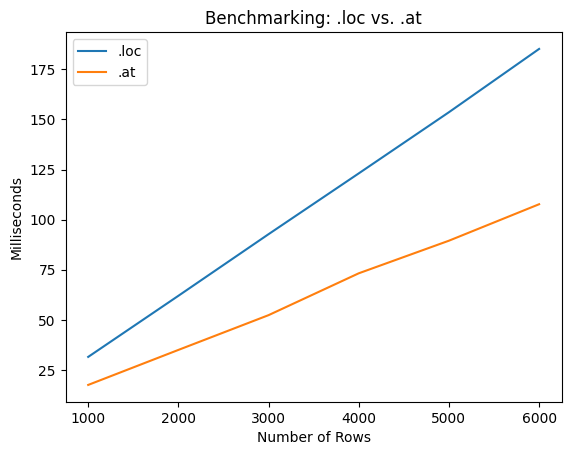

In [13]:
#Q11 What is faster, loc, or at?
total = 0
for idx in df.index:
    for col in df.columns:
        total += df.loc[idx, col]
        
plotting_data = pd.Series(dtype=float)
for i in range(1000, 7000, 1000):
    test_df = rand_df(i)
    t0 = time.time()
    total = 0
    for idx in test_df.index:
        for col in test_df.columns:
            total += test_df.loc[idx, col]
    t1 = time.time()
    plotting_data[i] = (t1 - t0) * 1000
    

plotting_data2 = pd.Series(dtype=float)
for i in range(1000, 7000, 1000):
    test_df = rand_df(i)
    t0 = time.time()
    total = 0
    for idx in test_df.index:
        for col in test_df.columns:
            total += test_df.at[idx, col]
    t1 = time.time()
    plotting_data2[i] = (t1 - t0) * 1000     


plotting_data.plot(label='.loc',xlabel='Number of Rows', ylabel='Milliseconds', title='Benchmarking: .loc vs. .at')
plotting_data2.plot(label='.at',xlabel='Number of Rows', ylabel='Milliseconds', title='Benchmarking: .loc vs. .at')
plt.legend()

In [14]:
# HOW LONG DOES THIS TAKE TO RUN, FOR DATAFRAMES WITH DIFFERENT NUMBERS OF ROWS?
def laugh(x):
    return "qwerty" * x

result = df["A"].apply(laugh).tolist()
# HOW LONG DOES THIS TAKE TO RUN, FOR DATAFRAMES WITH DIFFERENT NUMBERS OF ROWS?
result = []
for val in df["A"]:
    result.append(laugh(val))

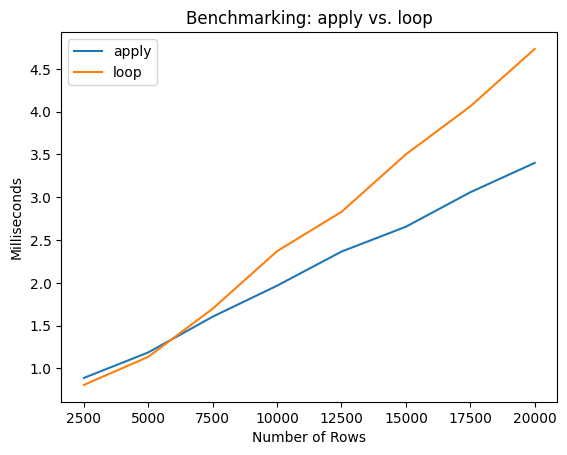

In [15]:
#Q12 What is faster, a loop or .apply?
total = 0
for idx in df.index:
    for col in df.columns:
        total += df.loc[idx, col]
        
plotting_data = pd.Series(dtype=float)
for i in range(2500, 22500, 2500):
    test_df = rand_df(i)
    t0 = time.time()
 #   total = 0
   # for idx in test_df.index:
     #   for col in test_df.columns:
    #        total += test_df.loc[idx, col]
    result = test_df["A"].apply(laugh).tolist()
    t1 = time.time()
    plotting_data[i] = (t1 - t0) * 1000
    

plotting_data2 = pd.Series(dtype=float)
for i in range(2500, 22500, 2500):
    test_df = rand_df(i)
    t0 = time.time()
  #  total = 0
 #   for idx in test_df.index:
  #      for col in test_df.columns:
   #         total += test_df.at[idx, col]
    result = []
    for val in test_df["A"]:
        result.append(laugh(val))
    t1 = time.time()
    plotting_data2[i] = (t1 - t0) * 1000     


plotting_data.plot(label='apply',xlabel='Number of Rows', ylabel='Milliseconds', title='Benchmarking: apply vs. loop')
plotting_data2.plot(label='loop',xlabel='Number of Rows', ylabel='Milliseconds', title='Benchmarking: apply vs. loop')
plt.legend()